In [1]:
import pandas as pd
import numpy as np
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts import project_functions

path = 'C:/Users/Home Computer/Desktop/temp/insurance.csv'

df = project_functions.load_clean_df(path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


I will showcase my use of method chaining with this somewhat useless method that removes all at-risk populations from the dataset. I won't be using this set at all, but it is to showcase **Task 3**

In [2]:
df_showcase = project_functions.remove_smokers_highlowBMI_highAge(df)
df_showcase

,age,sex,bmi,children,region,charges
3,33,male,22.705,0,northwest,21984.47061
5,31,female,25.740,0,southeast,3756.62160
7,37,female,27.740,3,northwest,7281.50560
10,25,male,26.220,0,northeast,2721.32080
15,19,male,24.600,1,southwest,1837.23700
...,...,...,...,...,...,...
1316,19,female,20.600,0,southwest,1731.67700
1319,39,female,26.315,2,northwest,7201.70085
1324,31,male,25.935,1,northwest,4239.89265
1328,23,female,24.225,2,northeast,22395.74424


Now that the data is loaded and we have showcased our method chaining, we will perform EDA on our initial dataset with help using the methods in our script.

Lets get a general idea of our dataset.

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


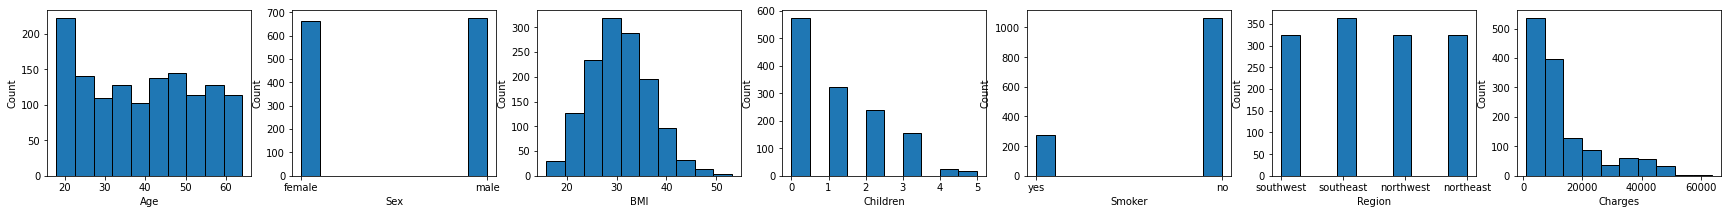

In [3]:
project_functions.display_big_picture(df)

From this we see that the age is somewhat even, apart from an overrepresented ~18-25 range.

Sex is very even.

BMI follows a roughly normal curve, with the mean BMI ~= 30.

The mean number of children is ~= 1, but the most represented group is those without children.

The strong majority of patients are non-smokers.

There is an even distribution between regions.

Most people have low medical expenses.




Now that we have a good idea of how the data looks, lets probe into some of the differences, e.g., do smokers pay more etc.?

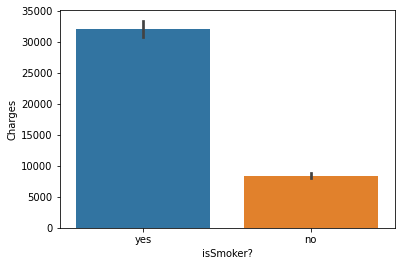

In [4]:
project_functions.cost_is_smoker(df)

It's interesting but not surprising to see that smokers have much higher medical costs on average.

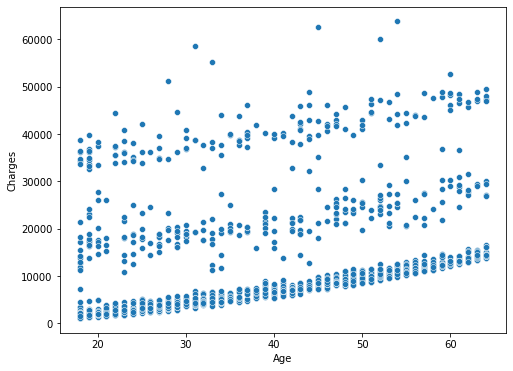

In [5]:
project_functions.cost_by_age(df)

Again, it is interesting but not surprising to see that health expenses increase seemingly almost linearly with age.

Lets see if there's any difference between men and women with charges, and lets see if men or women smoke more.

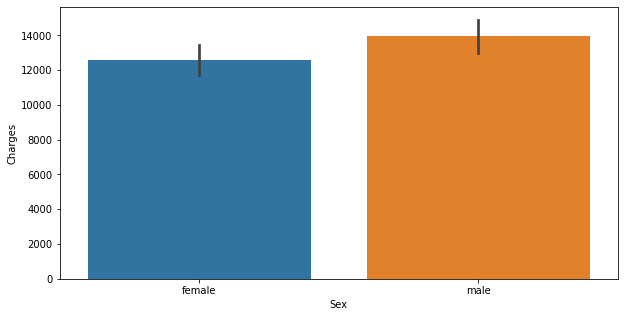

In [6]:
project_functions.cost_by_sex(df)

In [7]:
project_functions.smokers_by_sex(df)

sex
female    115
male      159
Name: smoker, dtype: int64


sex
female    547
male      517
Name: smoker, dtype: int64


There are more smoking men than smoking women. Perhaps this is a reason men have higher charges than women?





This completes my basic EDA. I will now attempt to answer some research questions based on this data:

1. Is there a correlation between BMI and charges? Is there a correlation between BMI, sex, and their charges?

2. Does the pseudo-linear increase in charges by age hold with smokers as well? Or do older smokers suffer exponentially more than younger smokers?

3. Is there any correlation between number of children and charges?

4. Is there a large increase in charges with both high BMI and smoker = yes?

To answer the question: Who pays the most for medical expenses?

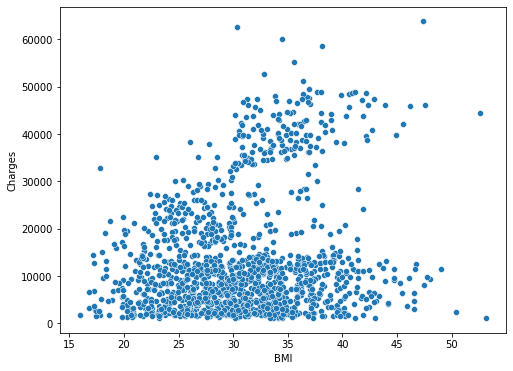

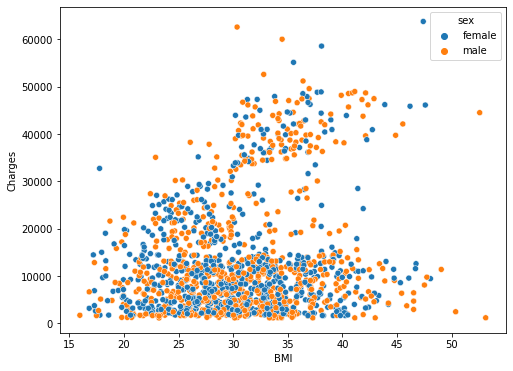

In [8]:
project_functions.cost_by_bmi(df)
project_functions.cost_by_bmi_and_sex(df)

From the above it seems very obvious that BMI has an influence over medical costs. Around BMI = 30 there is a spike in cost for a large portion of patients.

Gender and BMI do not appear to have any correlation.

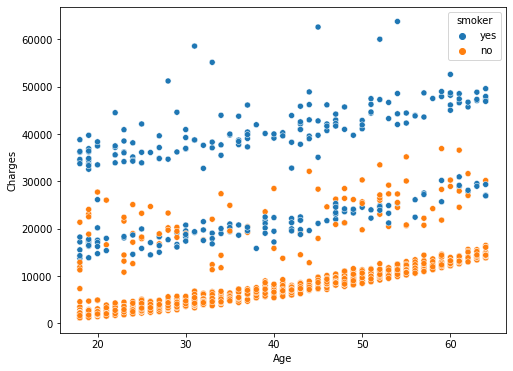

In [9]:
project_functions.cost_by_age_and_smoker(df)

Older and younger smokers experience nearly the same relative risk compared to their non-smoking counterparts. Older smokers and younger smokers experience the same increase in risk.

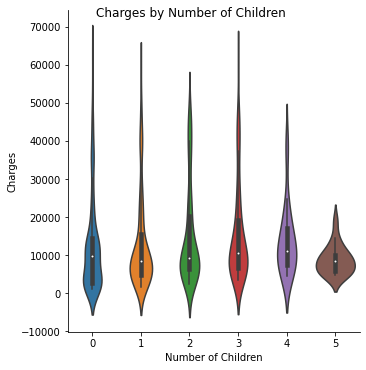

In [10]:
project_functions.cost_by_children(df)

There does not appear to be any correlation between number of children and medical charges.

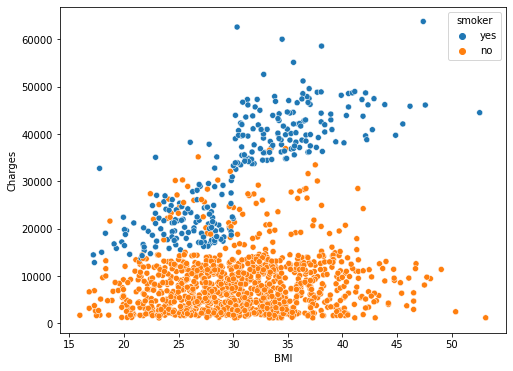

In [11]:
project_functions.cost_by_bmi_and_smoker(df)

When we just looked at cost by BMI it would be easy to assume BMI alone was responsible for higher charges. This is interesting, nonsmokers experience roughly equal charges across all BMIs, but around 30BMI and higher smokers receive a massive spike in costs. For BMI < 30 the smokers appear to have charges around 12 000 to 30 000, but for BMI > 30 the smokers shoot up between 32 000 and 48 000 with some outliers.

It appears that smoking has the highest correlation with cost, then age, then BMI.

The group that pays the most, it would follow, is one who smokes, has high age, and has high BMI.